<a href="https://colab.research.google.com/github/taniamaki/MLPROJ20/blob/main/CitacaoPronunciamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Citação do Banco do Brasil em Pronunciamentos

Monitorar as falas dos parlamentares nas Casas Legislativas em busca de citações ou temas de interesse do Banco do Brasil

O monitoramente atualmente é efetuado de forma manual diariamente por Assessor. O tempo médio gasto por dia é de 45 minutos.

Benefícios:
- Liberação de mão-de-obra especializada para tarefas com alto grau de complexidade
- Tempestividade no tratamento das citações ou demandas que exijam manifestação por parte do Banco do Brasil
- Monitoramento dos temas de interesse tratados nas Casas Legislativas

## Web Scrapping dos pronunciamentos nos sites das Casas Legislativas

### Senado Federal
https://www12.senado.leg.br/hpsenado

A)	Acessar no sitedo Senado (https://www12.senado.leg.br/hpsenado) e proceder conforme abaixo, buscando pelas respectivas “Notas Taquigráficas” das sessões e reuniões (estas últimas, apenas quando alertado pela Direl):

•	Plenário: clique em “Atividade Legislativa” e depois em “Plenário”, em “Sessão Plenária” e em “Notas Taquigráficas” (link: https://www25.senado.leg.br/web/atividade/sessao-plenaria);

•	Comissões: clique em “Atividade Legislativa” e depois em “Comissões”, em “Agenda” e, na respectiva reunião, no botão com a letra “N”, que significa “Notas Taquigráficas” (link: https://legis.senado.leg.br/comissoes/?0).

### Câmara dos Deputados
https://www.camara.leg.br/

B)	Acessar no site da Câmara (https://www.camara.leg.br/) e proceder conforme abaixo, buscando pelas respectivas “Notas Taquigráficas” das sessões e reuniões (estas últimas, apenas quando alertado pela Direl):

•	Plenário e Comissões: clique em “Atividade Legislativa”, depois em “Agenda”, no link da respectiva sessão ou reunião e em “Íntegra em texto”.

Obs.: em relação às comissões da Câmara dos Deputados, apenas a CCJC possui Notas Taquigráficas das reuniões (“Íntegra em texto”). Para buscar o que foi dito nas reuniões das demais comissões, será necessário ouvir o áudio através do campo “Trechos por orador”, na página da reunião. 

### Congresso Nacional
https://www.congressonacional.leg.br/

C)	Acessar no site do Congresso Nacional (https://www.congressonacional.leg.br/) e proceder conforme abaixo, buscando pelas respectivas “Notas Taquigráficas” das sessões e reuniões (estas últimas, apenas quando alertado pela Direl):

•	Plenário: clique em “Menu”, depois em “Sessões e Reuniões”, em “Agenda do Congresso Nacional” e em “Notas Taquigráficas” (link: https://www.congressonacional.leg.br/sessoes/agenda-do-congresso-nacional).

•	Comissões Mistas: clique em “Menu”, depois em “Sessões e Reuniões”, em “Agenda do Congresso, Senado e Câmara”, desmarque os filtros “Senado Federal” e “Câmara dos Deputados” deixando ativo apenas o filtro “Congresso Nacional” e, na lista “Reuniões de Comissões”, clique no link da respectiva reunião e, por fim:  se abrir o site do Senado, clique no botão com a letra “N”, que significa “Notas Taquigráficas”; se abrir o site da Câmara, clique em “Íntegra em texto” ou, se não houver, será necessário ouvir o áudio através do campo “Trechos por orador” (link: https://www.congressonacional.leg.br/sessoes/agenda-do-congresso-senado-e-camara).


##SENADO SESSÃO PLENÁRIA - WebScrapping


In [ ]:
#!pip install beautifulsoup4

In [ ]:
#import
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [ ]:

links = []
l = 'https://www25.senado.leg.br/web/atividade/sessao-plenaria'

#for i in range(375):   # 2019 e 2020
for i in range(375):
  #print(l)
  html = urlopen(l)
  bs = BeautifulSoup(html.read(), 'html.parser')  

  """
  link da opção Sessão anterior, que redirecina aos itens históricos
  item da Sessão anterior retorna como o link atual para extração do link das notas taquigráficas
  """
  div_anterior = bs.find(class_ = 'span12 text-center')
  link_anterior = div_anterior.findAll('a')
  l = link_anterior[0].get('href')

  #link das notas taquigráficas
  div_links = bs.find(class_ = 'botoes row-fluid')
  link = div_links.findAll('a')
  links.append(link[0].get('href'))
  print(link[0].get('href'))


http://www.senado.leg.br/atividade/plenario/ordemdodia/#/divisao/SF/80/25/11/2020
https://www25.senado.leg.br/web/atividade/notas-taquigraficas/-/notas/s/24363
https://www25.senado.leg.br/web/atividade/notas-taquigraficas/-/notas/s/24357
https://www25.senado.leg.br/web/atividade/notas-taquigraficas/-/notas/s/24362
https://www25.senado.leg.br/web/atividade/notas-taquigraficas/-/notas/s/24344
https://www25.senado.leg.br/web/atividade/notas-taquigraficas/-/notas/s/24337
https://www25.senado.leg.br/web/atividade/notas-taquigraficas/-/notas/s/24334
https://www25.senado.leg.br/web/atividade/notas-taquigraficas/-/notas/s/24333
https://www25.senado.leg.br/web/atividade/notas-taquigraficas/-/notas/s/24322
https://www25.senado.leg.br/web/atividade/notas-taquigraficas/-/notas/s/24320
https://www25.senado.leg.br/web/atividade/notas-taquigraficas/-/notas/s/24316
https://www25.senado.leg.br/web/atividade/notas-taquigraficas/-/notas/s/24310
https://www25.senado.leg.br/web/atividade/notas-taquigrafica

In [ ]:
links = links[1:len(links)]

In [ ]:
import re
import string
import pandas as pd

pronunciamento = []
for l in links:
  html = urlopen(l)
  bs = BeautifulSoup(html.read(), 'html.parser')
  txt = bs.findAll('div', {'class':'principalStyle'})
  
  #cabecalho
  cabecalho = bs.find('div', {'class':'container-fluid'})
  cab = cabecalho.p.find_next('p').get_text()
  #max indice bold
  i_bold = []
  for i in range(0, len(txt)):
    if txt[i].b is not None:
      i_bold.append(i)
  max_bold = max(i_bold)

  #Agrupar falas por indivíduo
  pron = []
  for i in range(0, max_bold):
    aux = []
    if txt[i].b is not None:
      #print(txt[i].get_text())
      aux.append(txt[i].get_text())
      j = 1
      while txt[i + j].b is None:
        #print(txt[i + j].get_text())
        aux.append(txt[i + j].get_text())
        j += 1
      pron.append(aux)    

  #unificar os itens de um bloco de fala
 
  for p in pron:
    separator = ' '
    #pronunciamento.append([cab])
    pronunciamento.append([l, cab, separator.join(p)])
    #print(pronunciamento)  


In [ ]:
pronunciamento

[['https://www25.senado.leg.br/web/atividade/notas-taquigraficas/-/notas/s/24363',
  ' 2ª SESSÃO LEGISLATIVA ORDINÁRIA DA  56ª LEGISLATURA  Em 19 de novembro de 2020  (quinta-feira)  Às 16 horas   99 ª SESSÃO  (SESSÃO DELIBERATIVA REMOTA)  ',
  'O SR. PRESIDENTE (Antonio Anastasia. PSD - MG. Fala da Presidência.) – Declaro aberta a sessão.  Sob a proteção de Deus, iniciamos os nossos trabalhos.  As mãos serão abaixadas, e, neste momento, serão iniciadas as inscrições.  A presente sessão deliberativa remota foi convocada nos termos do Ato da Comissão Diretora nº 7, de 2020, que institui o Sistema de Deliberação Remota do Senado Federal, e é destinada à deliberação da seguinte pauta:  – Medida Provisória nº 993, de 2020, Relator: Senador Carlos Fávaro;  – Projeto de Lei nº 172, de 2020 (Substitutivo da Câmara dos Deputados ao Projeto de Lei do Senado nº 103, de 2007), do Senador Aloizio Mercadante, Relator: Senador Diego Tavares;  – Projeto de Lei nº 6.549, de 2019, do Deputado Vitor Lip

In [ ]:
pronunciamento[880:881]

[['https://www25.senado.leg.br/web/atividade/notas-taquigraficas/-/notas/s/24333',
  ' 2ª SESSÃO LEGISLATIVA ORDINÁRIA DA  56ª LEGISLATURA  Em 20 de outubro de 2020  (terça-feira)  Às 16 horas   93 ª SESSÃO  (SESSÃO DELIBERATIVA ORDINÁRIA)  ',
  'O SR. PRESIDENTE (Davi Alcolumbre. Bloco Parlamentar Vanguarda/DEM - AP) – Sim. ']]

In [ ]:
df = pd.DataFrame(data=pronunciamento, columns=['LINK','CABECALHO','TXT'])
df['IN_BB'] = df['TXT'].str.contains("Banco do Brasil|Banco Público|Bancos Públicos|Bancos Oficiais|Banco Oficial|Bancos Federais|Banco Federal|Banco Federal|Instituição Financeira Pública|Instituições Financeiras Públicas|Instituição Financeira Oficial|Instituições Financeiras Oficiais", case=False, regex=True) 
df[df['IN_BB']== True]

LINK  ... IN_BB
117    https://www25.senado.leg.br/web/atividade/nota...  ...  True
344    https://www25.senado.leg.br/web/atividade/nota...  ...  True
374    https://www25.senado.leg.br/web/atividade/nota...  ...  True
378    https://www25.senado.leg.br/web/atividade/nota...  ...  True
526    https://www25.senado.leg.br/web/atividade/nota...  ...  True
...                                                  ...  ...   ...
53101  https://www25.senado.leg.br/web/atividade/nota...  ...  True
53181  https://www25.senado.leg.br/web/atividade/nota...  ...  True
53211  https://www25.senado.leg.br/web/atividade/nota...  ...  True
56161  https://www25.senado.leg.br/web/atividade/nota...  ...  True
56206  https://www25.senado.leg.br/web/atividade/nota...  ...  True

[221 rows x 4 columns]

In [ ]:
aux2 = df[df['IN_BB'] ==  True]
aux2.to_csv('validar.csv')
aux2

LINK  ... IN_BB
117    https://www25.senado.leg.br/web/atividade/nota...  ...  True
344    https://www25.senado.leg.br/web/atividade/nota...  ...  True
374    https://www25.senado.leg.br/web/atividade/nota...  ...  True
378    https://www25.senado.leg.br/web/atividade/nota...  ...  True
526    https://www25.senado.leg.br/web/atividade/nota...  ...  True
...                                                  ...  ...   ...
53101  https://www25.senado.leg.br/web/atividade/nota...  ...  True
53181  https://www25.senado.leg.br/web/atividade/nota...  ...  True
53211  https://www25.senado.leg.br/web/atividade/nota...  ...  True
56161  https://www25.senado.leg.br/web/atividade/nota...  ...  True
56206  https://www25.senado.leg.br/web/atividade/nota...  ...  True

[221 rows x 4 columns]

In [ ]:
df.to_csv('pronunciamentos_senado.csv')

## SENADO - DATA PREPARATION

In [ ]:
#montar drive google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#imports 
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn import metrics

In [ ]:
# ler dados do csv 
data = pd.read_csv('/content/drive/My Drive/MLProjetos20/pronunciamentos_senado.csv')

# construção do ABT 
txt = data[['TXT', 'IN_BB']]
txt.head()

TXT  IN_BB
0  O SR. PRESIDENTE (Antonio Anastasia. PSD - MG....  False
1  O SR. HUMBERTO COSTA (Bloco Parlamentar da Res...  False
2  O SR. PRESIDENTE (Antonio Anastasia. PSD - MG)...  False
3  A SRA. ROSE DE FREITAS (PODEMOS - ES. Pela ord...  False
4  O SR. PRESIDENTE (Antonio Anastasia. PSD - MG)...  False

In [ ]:
#percentual de cada classe
txt['IN_BB'].value_counts(normalize=True) 

False    0.996116
True     0.003884
Name: IN_BB, dtype: float64

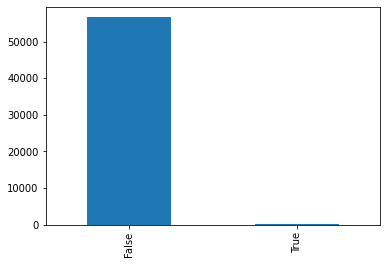

In [ ]:
#plotar distribuição das classes
txt['IN_BB'].value_counts().plot(kind='bar')

In [ ]:
#atribuir valores X e y
X = txt['TXT']
y = txt['IN_BB']

In [ ]:
# Separar os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((45516,), (11380,), (45516,), (11380,))

In [ ]:
X_train.head()

34061    O SR. CARLOS EDUARDO CAUDURO PADIN – Pois não....
45390    O SR. MARCOS ROGÉRIO (Bloco Parlamentar Vangua...
46538    O SR. PRESIDENTE (Izalci Lucas. Bloco Parlamen...
43024    O SR. JORGE KAJURU (Bloco Parlamentar Senado I...
24095    O SR. PRESIDENTE (Nelsinho Trad. PSD - MS) – I...
Name: TXT, dtype: object

In [ ]:
#proporção das classes nos dados de treino e teste
print('Treino: ', y_train.shape, y_train.value_counts(normalize=True), '\n')
print('Teste: ', y_test.shape, y_test.value_counts(normalize=True))

Treino:  (45516,) False    0.996463
True     0.003537
Name: IN_BB, dtype: float64 

Teste:  (11380,) False    0.994728
True     0.005272
Name: IN_BB, dtype: float64


In [ ]:
tfidf_vectorizer = TfidfVectorizer()

tfidf_vectorizer.fit(X_train)
print('Vocabulario: ')
print(tfidf_vectorizer.vocabulary_)

tfidf_vector = tfidf_vectorizer.transform(X_train)
print('\Dimensões da matriz: ')
print(tfidf_vector.shape)

Vocabulario: 
{'sr': 62296, 'carlos': 12899, 'eduardo': 25529, 'cauduro': 13304, 'padin': 48569, 'pois': 51323, 'não': 47102, 'eu': 29711, 'acho': 2745, 'que': 54666, 'estou': 29383, 'como': 15510, 'senador': 60685, 'rodrigo': 59193, 'pacheco': 48488, 'precisando': 52104, 'de': 19918, 'uma': 66451, 'haste': 35216, 'maior': 42923, 'aqui': 7390, 'para': 48850, 'poder': 51270, 'falar': 31070, 'quando': 54621, 'aceitei': 2576, 'convite': 18177, 'participar': 49164, 'justamente': 40703, 'por': 51575, 'esse': 29016, 'envolvimento': 27783, 'da': 19731, 'justiça': 40742, 'eleitoral': 25762, 'com': 15236, 'essa': 29014, 'época': 69138, 'revolução': 58900, 'constitucionalista': 17284, 'fiquei': 32128, 'imaginando': 36391, 'poderia': 51276, 'dizer': 24712, 'mais': 42930, 'significativo': 61231, 'já': 40764, 'prevendo': 52807, 'outros': 48406, 'me': 43988, 'antecederiam': 6141, 'adiantariam': 3350, 'muito': 45776, 'daquilo': 19851, 'ocorreu': 47407, 'comum': 16030, 'em': 25997, 'escritos': 28417, 

In [ ]:
# Pipeline 
pipeline = Pipeline([
  ('vect', CountVectorizer(max_df=1, max_features=50000, ngram_range=(1,2))),
  ('tfidf', TfidfTransformer(use_idf=True)),
  ('cls', SGDClassifier(loss='log', alpha=1e-06, penalty='elasticnet', max_iter=60)),
])

In [ ]:
%%time

cls = pipeline.fit(X_train, y_train)

CPU times: user 21.2 s, sys: 646 ms, total: 21.8 s
Wall time: 21.8 s


In [ ]:
pred = cls.predict(X_test)

In [ ]:
cls.score(X_test, y_test)

0.994639718804921

In [ ]:
f1_score(y_test, pred, average='weighted')

0.9923784026934578

In [ ]:

print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

       False       0.99      1.00      1.00     11320
        True       0.40      0.03      0.06        60

    accuracy                           0.99     11380
   macro avg       0.70      0.52      0.53     11380
weighted avg       0.99      0.99      0.99     11380



# SENADO - ANÁLISE DE IMPORTANCIA

In [ ]:
#montar drive google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#imports 
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# ler dados do csv 
data2 = pd.read_csv('/content/drive/My Drive/MLProjetos20/validar.csv', encoding='unicode_escape')
data2
data2[data2.ENFOQUE.notna()]
# construção do ABT 
df = data2[['TXT', 'ENFOQUE']].dropna()
df = df.drop_duplicates()

df.reset_index()
df

TXT   ENFOQUE
5   A SRA. SORAYA THRONICKE (Bloco Parlamentar PSD...  NEGATIVO
6   O SR. JAYME CAMPOS (Bloco Parlamentar Vanguard...  NEGATIVO
7   O SR. JORGINHO MELLO (Bloco Parlamentar Vangua...  NEGATIVO
8   O SR. EDUARDO BRAGA (Bloco Parlamentar Unidos ...  NEGATIVO
9   O SR. OTTO ALENCAR (PSD - BA. Pela Liderança.)...  NEGATIVO
11  A SRA. LEILA BARROS (Bloco Parlamentar Senado ...  POSITIVO
14  A SRA. ELIZIANE GAMA (Bloco Parlamentar Senado...  POSITIVO
15  O SR. JORGINHO MELLO (Bloco Parlamentar Vangua...  POSITIVO
16  O SR. OMAR AZIZ (PSD - AM. Para proferir parec...  POSITIVO
17  O SR. JORGINHO MELLO (Bloco Parlamentar Vangua...  POSITIVO
18  O SR. JORGINHO MELLO (Bloco Parlamentar Vangua...  POSITIVO
19  O SR. JORGINHO MELLO (Bloco Parlamentar Vangua...  NEGATIVO
20  A SRA. KÁTIA ABREU (Bloco Parlamentar Unidos p...  NEGATIVO
21  O SR. JORGINHO MELLO (Bloco Parlamentar Vangua...  POSITIVO
22  O SR. WELLINGTON FAGUNDES (Bloco Parlamentar V...    NEUTRO
23  O SR. ESPERIDIÃO AMIN (Bloco Parlamentar Unido...  POSITIVO
24  A SRA. KÁTIA ABREU (Bloco Parlamentar Unidos p...  NEGATIVO
25  O SR. JORGINHO MELLO (Bloco Parlamentar Vangua...  POSITIVO
26  O SR. JEAN PAUL PRATES (Bloco Parlamentar da R...  POSITIVO
28  O SR. JORGINHO MELLO (Bloco Parlamentar Vangua...    NEUTRO
29  O SR. FERNANDO BEZERRA COELHO (Bloco Parlament...  NEGATIVO
30  O SR. IZALCI LUCAS (Bloco Parlamentar PSDB/PSL...    NEUTRO
33  O SR. JORGINHO MELLO (Bloco Parlamentar Vangua...  NEGATIVO
35  O SR. ALVARO DIAS (PODEMOS - PR)  ... para o ...  POSITIVO
37  O SR. ALVARO DIAS (PODEMOS - PR)  ... do equi...  NEGATIVO
38  O SR. VENEZIANO VITAL DO RÊGO (Bloco Parlament...  NEGATIVO
39  A SRA. KÁTIA ABREU (Bloco Parlamentar Unidos p...  NEGATIVO
40  O SR. JORGE KAJURU (Bloco Parlamentar Senado I...  NEGATIVO
46  O SR. LUIS CARLOS HEINZE (Bloco Parlamentar Un...  NEGATIVO
47  O SR. LUIZ DO CARMO (Bloco Parlamentar Unidos ...  POSITIVO
48  O SR. ESPERIDIÃO AMIN (Bloco Parlamentar Unido...  POSITIVO
51  O SR. PRESIDENTE (Davi Alcolumbre. Bloco Parla...  POSITIVO
52  O SR. TELMÁRIO MOTA (Bloco Parlamentar da Resi...  POSITIVO
53  A SRA. KÁTIA ABREU (Bloco Parlamentar Unidos p...  POSITIVO
54  A SRA. KÁTIA ABREU (Bloco Parlamentar Unidos p...  POSITIVO
82  O SR. ALVARO DIAS (PODEMOS - PR. Para discursa...  POSITIVO
83  O SR. PRESIDENTE (Dário Berger. Bloco Parlamen...  POSITIVO
85  O SR. CONFÚCIO MOURA (Bloco Parlamentar Unidos...    NEUTRO
86  O SR. ELMANO FÉRRER (PODEMOS - PI. Para discur...    NEUTRO
87  A SRA. ZENAIDE MAIA (Bloco Parlamentar da Resi...  NEGATIVO

POSITIVO    19
NEGATIVO    16
NEUTRO       5
Name: ENFOQUE, dtype: int64


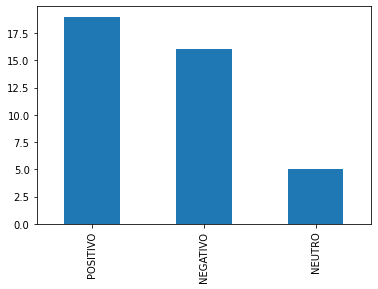

In [ ]:
print(df.ENFOQUE.value_counts())
df.ENFOQUE.value_counts().plot(kind='bar')

In [ ]:
X = df['TXT']
y = df['ENFOQUE']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32,), (8,), (32,), (8,))

In [ ]:
print('TREINO : \n',y_train.shape, y_train.value_counts(normalize=True),'\n')
print('TESTE  : \n',y_test.shape, y_test.value_counts(normalize=True))

TREINO :  (32,) POSITIVO    0.46875
NEGATIVO    0.40625
NEUTRO      0.12500
Name: ENFOQUE, dtype: float64 

TESTE  :  (8,) POSITIVO    0.500
NEGATIVO    0.375
NEUTRO      0.125
Name: ENFOQUE, dtype: float64


In [ ]:
# instancia o transform TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
# tokeniza e cria o vocabulário
tfidf_vectorizer.fit(X_train)
# mostra o vocabulário criado
print('Vocabulário: ')
print(tfidf_vectorizer.vocabulary_)
print('\nPeso de cada palavra do vocabulário: ')
print(tfidf_vectorizer.idf_)
# cria matriz de frequencia na representação TF-IDF
tfidf_vector = tfidf_vectorizer.transform(X_train)
# mostra as dimensões da matrix de frequência
print('\nDimensões da matrix: ')
print(tfidf_vector.shape)

Vocabulário: 
{'sr': 4366, 'jorginho': 2703, 'mello': 2960, 'bloco': 802, 'parlamentar': 3384, 'vanguarda': 4682, 'pl': 3522, 'sc': 4216, 'para': 3358, 'discutir': 1632, 'muito': 3089, 'bem': 786, 'presidente': 3658, 'quero': 3886, 'agradecer': 392, 'exa': 2019, 'oportunidade': 3294, 'de': 1405, 'usar': 4654, 'da': 1386, 'palavra': 3347, 'dizer': 1681, 'que': 3864, 'pronampe': 3757, 'grande': 2375, 'todos': 4528, 'nós': 3215, 'senadores': 4256, 'senadoras': 4255, 'estamos': 1957, 'encontrando': 1819, 'socorrer': 4332, 'os': 3316, 'micro': 3000, 'pequenos': 3471, 'empresários': 1807, 'essa': 1941, 'aprovação': 582, 'ontem': 3275, '12': 11, 'bilhões': 801, 'incluindo': 2535, 'aqueles': 594, '15': 28, 'senhor': 4258, 'não': 3213, 'sabe': 4175, 'importância': 2503, 'isso': 2677, 'microempreendedor': 3002, 'do': 1687, 'brasil': 822, 'vamos': 4681, 'ter': 4472, 'então': 1868, 'quase': 3862, '28': 148, 'ainda': 415, 'pouco': 3602, 'eu': 2009, 'deixar': 1438, 'isto': 2678, 'sempre': 4251, 'viv

In [ ]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier() ), # default hinge. to get proba=log or modified_huber
])

In [ ]:
# Define os parâmetros para o pipeline
parameters = {
    'clf__alpha': 1e-06, # constante que multiplica o termo de regularização. Quanto maior, mais forte a regularização.
    'clf__max_iter': 50, # número máximo de épocas(passagem por todos os dados de treinamento)
    'clf__penalty:': 'elasticnet', # A penalização (termo de regularização). 'l1', 'l2' ou 'elasticnet' (uma combinação de l1 e l2) 
    'tfidf__norm:': 'l2', 
    'tfidf__use_idf:': True,
    'vect__max_df:': 1.0,
    'vect__max_features:': 50000,
    'vect__ngram_range:': (1, 2)}


In [ ]:
X_train[5]


'A SRA. SORAYA THRONICKE (Bloco Parlamentar PSDB/PSL/PSL - MS. Pela ordem.) \x96 Sr. Presidente, muito obrigada pela oportunidade.  Senador Izalci, vou ser breve.  Quero parabenizar a Senadora Kátia Abreu, o Senador Jorginho.  Lembro que, desta vez, tomara que esse dinheiro chegue lá nos não queridinhos.  Preocupa-me muito, neste momento agora, exatamente de campanha eleitoral, que candidatos não estejam conseguindo abrir as suas contas no Banco do Brasil e na Caixa Econômica. Nos bancos privados, já nem falo.  Porém, como já disse o Presidente Jair Bolsonaro, os bancos públicos, como é a Caixa, e de economia mista, como é o Banco do Brasil, que têm dinheiro público, estão ali para atender a população em primeiro lugar.  Portanto, se a Justiça Eleitoral e todos os demais fazem um esforço diferenciado e de colaboração mútua para soltar, inclusive, decisões à meia-noite, 5h da manhã \x96 todos estão, nesse momento, trabalhando dobrado \x96, por que o Branco do Brasil, por que a Caixa têm

In [ ]:
%%time
# Treine o modelo(fit)
classificador = pipeline.fit(X_train, y_train)

CPU times: user 178 ms, sys: 1.99 ms, total: 180 ms
Wall time: 183 ms


In [ ]:
 # Faça a predição nos dados de teste
 predicted = classificador.predict(X_test)

In [ ]:
# avalie o modelo usando 'claasification_report' do sklearn
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

    NEGATIVO       0.00      0.00      0.00         3
      NEUTRO       0.00      0.00      0.00         1
    POSITIVO       0.43      0.75      0.55         4

    accuracy                           0.38         8
   macro avg       0.14      0.25      0.18         8
weighted avg       0.21      0.38      0.27         8



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Criar matrix de confusão
metrics.confusion_matrix(y_test, predicted)

array([[0, 0, 3],
       [0, 0, 1],
       [1, 0, 3]])

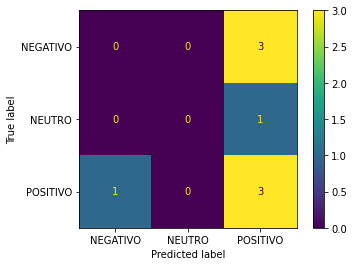

In [ ]:
# mostrar a matrix de confusão do modelo sobre todo o dataset
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classificador, X_test, y_test, values_format='d')

## CAMARA PLENÁRIO E COMISSÕES



In [ ]:
#import
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [ ]:
links = []
for i in range (1, 238):
  html = urlopen('https://www.camara.leg.br/agenda/?termo=&dataInicial__proxy=01/01/2019&dataInicial=01/01/2019&dataFinal__proxy=17/11/2020&dataFinal=17/11/2020&categorias=Plen%C3%A1rio,Comiss%C3%B5es&pagina={}'.format(i))
  bs = BeautifulSoup(html.read(), 'html.parser')

  cl = bs.findAll(class_ = 'g-agenda__nome')
  for c in cl:
    print(c.get('href'))
    links.append(c.get('href'))
 
  

https://www.congressonacional.leg.br/sessoes/agenda-do-congresso-nacional/-/pauta/23562
https://www.camara.leg.br/evento-legislativo/54469
https://www.camara.leg.br/evento-legislativo/54473
https://www.congressonacional.leg.br/sessoes/agenda-do-congresso-nacional/-/pauta/23564
https://www.camara.leg.br/evento-legislativo/54485
https://www.camara.leg.br/evento-legislativo/54488
https://www.camara.leg.br/evento-legislativo/54487
https://www.camara.leg.br/evento-legislativo/54489
https://www.camara.leg.br/evento-legislativo/54498
https://www.camara.leg.br/evento-legislativo/54494
https://www.camara.leg.br/evento-legislativo/54497
https://legis.senado.leg.br/comissoes/reuniao?reuniao=8182
https://www.camara.leg.br/evento-legislativo/54501
https://www.camara.leg.br/evento-legislativo/54502
https://www.camara.leg.br/evento-legislativo/54495
https://www.camara.leg.br/evento-legislativo/54505
https://www.camara.leg.br/evento-legislativo/54506
https://www.camara.leg.br/evento-legislativo/54510


KeyboardInterrupt: ignored

In [ ]:
#separar links de cada casa
congressonacional = []
camara = []
senado = []
for l in links:
  if l.startswith('https://www.congressonacional.leg.br/sessoes/agenda-do-congresso-nacional/-/pauta/'):
    congressonacional.append(l)
  elif l.startswith('https://www.camara.leg.br/evento-legislativo/'):
     camara.append(l) 
  elif l.startswith('https://legis.senado.leg.br/comissoes/'):
     senado.append(l)

In [ ]:
import re
import string
import pandas as pd
import time


txt_links = []
for l in camara:
  html = urlopen(l)
  bs = BeautifulSoup(html.read(), 'html.parser')
  time.sleep(5)
  a = bs.find('a', {'class':"links-adicionais__link-icone links-adicionais__link-icone--dialogo"})
  if a is not None:
    txt_links.append(a.get('href'))
    print(a.get('href'))

In [ ]:
#montar drive google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
links = [] 
links2020 = pd.read_csv('/content/drive/My Drive/MLProjetos20/links.csv')
l20 = pd.Series([links2020['LINK']])

In [ ]:
links20191 = pd.read_csv('/content/drive/My Drive/MLProjetos20/links2019.csv', encoding='unicode_escape')
l19 = pd.Series([links20191['LINK']])


In [ ]:
links20192 = pd.read_csv('/content/drive/My Drive/MLProjetos20/links20192.csv', encoding='unicode_escape')
l192 = pd.Series([links20192['LINK']])


In [ ]:
links = pd.concat([l20, l19, l192], ignore_index=True)
for l in links:
  for a in l:
    print(a)
 

https://escriba.camara.leg.br/escriba-servicosweb/html/59244
https://escriba.camara.leg.br/escriba-servicosweb/html/59265
https://escriba.camara.leg.br/escriba-servicosweb/html/59254
https://escriba.camara.leg.br/escriba-servicosweb/html/59268
https://escriba.camara.leg.br/escriba-servicosweb/html/59236
https://escriba.camara.leg.br/escriba-servicosweb/html/59256
https://escriba.camara.leg.br/escriba-servicosweb/html/59186
https://escriba.camara.leg.br/escriba-servicosweb/html/59275
https://escriba.camara.leg.br/escriba-servicosweb/html/59276
https://escriba.camara.leg.br/escriba-servicosweb/html/59278
https://escriba.camara.leg.br/escriba-servicosweb/html/59258
https://escriba.camara.leg.br/escriba-servicosweb/html/59290
https://escriba.camara.leg.br/escriba-servicosweb/html/59129
https://escriba.camara.leg.br/escriba-servicosweb/html/59298
https://escriba.camara.leg.br/escriba-servicosweb/html/59274
https://escriba.camara.leg.br/escriba-servicosweb/html/59279
https://escriba.camara.l

In [ ]:
pronunciamento = []

for l in links: 
  for a in l:
    html = urlopen(a)
    bs = BeautifulSoup(html.read(), 'html.parser')
    txt = bs.findAll('div', {'class':'principalStyle'})
    #print(txt)

    #titulo
    titulo = bs.find('div', {'class':"contentTitle"})
    if titulo is not None: 
      titulo = titulo.get_text()

    i_bold = []
    for i in range(0, len(txt)):
      if txt[i].b is not None:
        #print(i, txt[i].b)
        i_bold.append(i)
    max_bold = max(i_bold)

    pron = []
    for i in range(max_bold):
      aux = []
      if txt[i].b is not None:
        #print(txt[i].get_text())
        aux.append(txt[i].get_text())
        j = 1
        while txt[i + j].b is None:
          #print(txt[i + j].get_text())
          aux.append(txt[i + j].get_text())
          j += 1
        pron.append(aux)

    for p in pron:
      separator = ' '
      pronunciamento.append([ titulo, separator.join(p)])
      print([ titulo, separator.join(p)])


Streaming output truncated to the last 5000 lines.
['\n\n\n\n\n2ª SESSÃO LEGISLATIVA ORDINÁRIA DA \n56 ª LEGISLATURA\n89ª SESSÃO\n(Sessão Deliberativa Extraordinária (virtual))\nEm 9 de Julho de 2020 \n(Quinta-Feira)\nàs 13 horas e 55 minutos   \n', 'O SR. PRESIDENTE (Marcos Pereira. REPUBLICANOS - SP) - Como vota o PSL, Deputado Felipe Francischini?\n']
['\n\n\n\n\n2ª SESSÃO LEGISLATIVA ORDINÁRIA DA \n56 ª LEGISLATURA\n89ª SESSÃO\n(Sessão Deliberativa Extraordinária (virtual))\nEm 9 de Julho de 2020 \n(Quinta-Feira)\nàs 13 horas e 55 minutos   \n', 'O SR. FELIPE FRANCISCHINI (PSL - PR. Pela ordem. Sem revisão do orador.) - Sr. Presidente, o PSL libera a bancada, em razão da divergência que surgiu. No entanto, a minha posição pessoal como Deputado é pelo voto "sim".\n Como o Deputado Marcelo Ramos já explanou aqui, essa portaria é totalmente contra a lei que nós mesmo aprovamos aqui no Congresso Nacional. É claro que, naquela votação, alguns Deputados votaram "sim" e outros votaram "nã

In [ ]:
df = pd.DataFrame(data=pronunciamento, columns=['LINK', 'TITULO', 'TXT'])
df['IN_BB'] = df['TXT'].str.contains("Banco do Brasil|Banco Público|Bancos Públicos|Bancos Oficiais|Banco Oficial|Bancos Federais|Banco Federal|Banco Federal|Instituição Financeira Pública|Instituições Financeiras Públicas|Instituição Financeira Oficial|Instituições Financeiras Oficiais", case=False, regex=True) 
df[df['IN_BB']== True]

In [ ]:
aux2 = df[df['IN_BB'] ==  True]
aux2.to_csv('validar_camara.csv')
aux2

In [ ]:
df.to_csv('pronunciamentos_camara.csv')